In [26]:
import pandas as pd
import numpy as np

In [27]:
#导入经过数据预处理和特征工程的数据
df = pd.read_csv(r"C:\Users\Administrator\Desktop\数据挖掘\data_.csv",index_col=0)

In [28]:
df.head()

,0_x,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,0_y
0,-0.390704,-0.201280,-0.799040,0.772736,-0.096287,-1.119544,-0.377614,-1.019579,-0.679865,-0.287527,...,-0.545560,-0.176020,-0.506717,-0.458513,0.122106,-0.144873,0.338192,-0.259763,-0.385553,1
1,-0.165808,-0.815437,-0.572465,0.030293,0.048196,0.549394,-0.605482,1.008921,-0.440776,0.144876,...,1.169343,0.258752,0.028600,-0.458513,0.485705,0.741561,-0.198579,-0.314891,-0.580758,0
2,-0.165808,-0.815437,0.107262,-1.454592,1.878320,-0.887747,-0.662449,-0.581773,0.276492,-1.224401,...,-1.307739,-1.444106,-0.506717,0.241049,-5.453085,3.803787,1.411734,0.291510,1.956912,1
3,-0.390704,0.412876,0.560412,1.090925,-0.722382,1.105706,-0.662449,1.184043,0.754671,-0.071325,...,-0.164471,1.780456,0.028600,0.590830,0.546305,-1.031307,-0.735350,-0.425145,-1.361580,0
4,-0.390704,1.027033,-0.572465,-1.136402,1.781998,-0.563231,-0.092780,0.016562,-0.440776,-0.719930,...,-1.307739,-0.212251,-0.506717,-0.341919,0.697805,3.642617,-0.198579,-0.094381,0.590474,1


In [29]:
X = df.iloc[:,0:20]
y = df.iloc[:,20]

In [30]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [31]:
from time import time
import datetime
from sklearn.model_selection import GridSearchCV
import numpy as np

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from xgboost import XGBClassifier as XGBC
dtc = DecisionTreeClassifier(splitter='best',criterion='entropy',
                             max_depth=9,min_impurity_decrease=0,min_samples_leaf=6,random_state=25).fit(Xtrain,Ytrain)
rfc = RandomForestClassifier(n_estimators=111,random_state=90).fit(Xtrain,Ytrain)
lr = LR(C=0.1028).fit(Xtrain,Ytrain)
xgbc = XGBC(booster='gbtree',gamma=0.5,learning_rate=0.1,reg_alpha=0.5,cache_size = 5000).fit(Xtrain,Ytrain)

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
from mlxtend.classifier import StackingClassifier
model = StackingClassifier(classifiers=[dtc, rfc, xgbc,svc],
                          meta_classifier=lr)

In [34]:
end = model.fit(Xtrain,Ytrain)

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
from sklearn import metrics
Ytest_pred = end.predict(Xtest)
acc = metrics.accuracy_score(Ytest,Ytest_pred1)
precision = metrics.precision_score(Ytest,Ytest_pred1)
recall = metrics.recall_score(Ytest,Ytest_pred1)
f1 = metrics.f1_score(Ytest,Ytest_pred1)
auc= metrics.roc_auc_score(Ytest,Ytest_pred1)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc,precision,recall,f1,auc))

准确率:0.8453,精确率:0.8592,召回率:0.8287,f1-score:0.8437,auc:0.8454


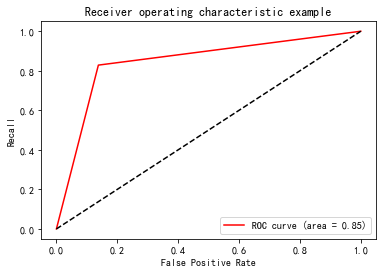

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score as AUC
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.figure()

#plt.figure()  #只建立一个画布，将所有的ROC曲线在一个画布上画出来
FPR, recall, thresholds = roc_curve(Ytest,Ytest_pred, pos_label=1)
area = AUC(Ytest,Ytest_pred)
plt.plot(FPR, recall,color='red',label='ROC curve (area = {:.2f})'.format(area))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()